In [1]:
from sklearn.datasets import *

In [2]:
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
import pandas as pd
x=boston['data']
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
y=boston['target']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
bos=pd.DataFrame(boston['data'])
bos.columns=boston['feature_names']
bos['Price']=boston['target']

In [8]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
train_x=boston['data'][:500]
print(train_x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [2.6838e-01 0.0000e+00 9.6900e+00 ... 1.9200e+01 3.9690e+02 1.4100e+01]
 [2.3912e-01 0.0000e+00 9.6900e+00 ... 1.9200e+01 3.9690e+02 1.2920e+01]
 [1.7783e-01 0.0000e+00 9.6900e+00 ... 1.9200e+01 3.9577e+02 1.5100e+01]]


In [14]:
train_y=boston['target'][:500]

In [15]:
KNR=KNeighborsRegressor(8)

In [16]:
KNR.fit(train_x,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=8, p=2,
          weights='uniform')

In [17]:
x_test.shape

(102, 13)

In [18]:
y_test.shape

(102,)

In [19]:
import numpy as np

In [17]:
for k in [1,3,5]:
    KNR=KNeighborsRegressor(k)
    KNR.fit(train_x,train_y)
    pred_test = KNR.predict(x_test)
    print("predicted value for k={}: {}".format(k,pred_test)) 

predicted value for k=1: [22.6 50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6  8.8 17.2 14.9 10.5
 50.  29.  23.  33.3 29.4 21.  23.8 19.1 20.4 29.1 19.3 23.1 19.6 19.4
 38.7 18.7 14.6 20.  20.5 20.1 23.6 16.8  5.6 50.  14.5 13.3 23.9 20.
 19.8 13.8 16.5 21.6 20.3 17.  11.8 27.5 15.6 23.1 24.3 42.8 15.6 21.7
 17.1 17.2 15.  21.7 18.6 21.  33.1 31.5 20.1 29.8 15.2 15.  27.5 22.6
 20.  21.4 23.5 31.2 23.7  7.4 48.3 24.4 22.6 18.3 23.3 17.1 27.9 44.8
 50.  23.  21.4 10.2 23.3 23.2 18.9 13.4 21.9 24.8 28.7 24.3 13.8 24.7
 14.1 18.7 28.1 19.8]
predicted value for k=3: [20.56666667 50.         24.46666667 10.63333333 21.13333333 20.43333333
 20.63333333 21.96666667 22.26666667 15.76666667 11.56666667 12.86666667
 15.26666667  9.73333333 40.9        24.03333333 22.7        29.1
 25.8        23.66666667 22.43333333 21.         19.96666667 31.53333333
 20.16666667 15.63333333 18.2        20.6        27.36666667 17.26666667
 16.73333333 19.8        18.86666667 22.03333333 22.76666667 21.4
  9.7333

In [18]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [19]:
rmse_val = []

for K in range(20):
    K = K+1
    KNR = KNeighborsRegressor(n_neighbors = K)
    KNR.fit(x_train,y_train)
    pred_test = KNR.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred_test)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7.69047666744715
RMSE value for k=  2 is: 6.838893601034783
RMSE value for k=  3 is: 6.971114538472075
RMSE value for k=  4 is: 6.90813139798055
RMSE value for k=  5 is: 7.193321521369938
RMSE value for k=  6 is: 7.223677329533764
RMSE value for k=  7 is: 7.361064876119771
RMSE value for k=  8 is: 7.373296787374415
RMSE value for k=  9 is: 7.293270111074736
RMSE value for k=  10 is: 7.471671926185532
RMSE value for k=  11 is: 7.3772409041348626
RMSE value for k=  12 is: 7.449076484263642
RMSE value for k=  13 is: 7.5355353772317075
RMSE value for k=  14 is: 7.617438883907111
RMSE value for k=  15 is: 7.655816932085267
RMSE value for k=  16 is: 7.760009595850772
RMSE value for k=  17 is: 7.850076738274447
RMSE value for k=  18 is: 7.928607094409227
RMSE value for k=  19 is: 7.962434478635982
RMSE value for k=  20 is: 7.981767827183324


In [20]:
import matplotlib.pyplot as plt

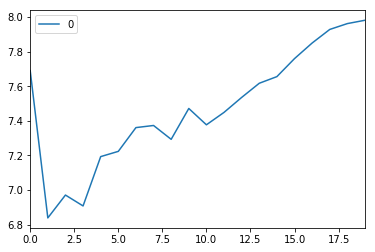

In [21]:
curve=pd.DataFrame(rmse_val)
curve.plot()
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(2)
KNR.fit(train_x,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [25]:
KNN=KNR.predict(x_test).reshape(-1,1)
KNN

array([[20.95],
       [50.  ],
       [25.85],
       [10.7 ],
       [21.  ],
       [20.15],
       [20.9 ],
       [18.6 ],
       [22.55],
       [17.1 ],
       [11.9 ],
       [14.5 ],
       [14.55],
       [ 8.05],
       [50.  ],
       [25.75],
       [22.2 ],
       [33.95],
       [26.2 ],
       [23.  ],
       [23.45],
       [19.35],
       [19.9 ],
       [30.75],
       [19.65],
       [16.75],
       [17.6 ],
       [22.2 ],
       [30.35],
       [18.75],
       [16.2 ],
       [19.75],
       [19.05],
       [21.05],
       [23.35],
       [18.35],
       [ 8.05],
       [34.95],
       [14.3 ],
       [13.15],
       [24.25],
       [19.65],
       [19.55],
       [14.5 ],
       [17.9 ],
       [19.1 ],
       [23.7 ],
       [19.65],
       [12.6 ],
       [23.4 ],
       [14.35],
       [21.7 ],
       [24.15],
       [33.6 ],
       [17.5 ],
       [22.4 ],
       [20.2 ],
       [17.35],
       [11.9 ],
       [21.6 ],
       [27.5 ],
       [20.45],
       [

#  Thankyou. well done Regression part